In [1]:
!pip show langgraph

Name: langgraph
Version: 0.4.7
Summary: Building stateful, multi-actor applications with LLMs
Home-page: 
Author: 
Author-email: 
License-Expression: MIT
Location: /opt/anaconda3/envs/env_langchain1/lib/python3.10/site-packages
Requires: langchain-core, langgraph-checkpoint, langgraph-prebuilt, langgraph-sdk, pydantic, xxhash
Required-by: 


In [2]:
from langchain_ollama.llms import OllamaLLM

#model = OllamaLLM(model="llama3.1")
model = OllamaLLM(model="deepseek-r1")

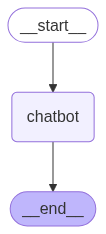

User:  Hi , my name is Gaurav


Assistant: <think>
Okay, so I just came across this message where someone named Gaurav sent "Hi" to another person also named Gaurav. It's a bit confusing because it sounds like two people are greeting each other with the same name. Let me try to figure out what's going on here.

First off, maybe it's a typo or a mistake in sending the message. Sometimes when you're messaging someone quickly, typos can happen without noticing. So perhaps the second "Gaurav" is supposed to be something else, like another name or maybe just an accidental repetition. I should consider if there's any context missing that could make this clearer.

Alternatively, it might not be a typo at all. Maybe they are using some kind of naming convention where both people have the same last name and first name, but their full names are different. For example, one could be Gaurav Singh and the other Gaurav Kadian or something like that. But without more information, it's hard to tell.

I wonder if there's a deeper reas

User:  what is my name


Assistant: <think>
Okay, so I'm trying to figure out how to answer the question "What's your name?" for the user. The conversation provided just shows back and forth messages where each side says "what is my name." It seems like it's an endless loop because both parties keep asking the same thing.

Hmm, maybe this is a test or something. I wonder if there's any hidden information or context that could help me understand what they're really looking for. But all I see is them repeating the question each time. It doesn't give any clues about their identity or why they need to know my name specifically.

Wait, perhaps it's a mistake in the conversation setup. Maybe one of them meant to ask something else but got confused with the other person. For example, if someone was supposed to ask me what my name is and ended up repeating the same message instead of sending a proper greeting or question. That could happen if there was an error in communication.

Alternatively, it's possible that they

User:  q


Goodbye!


In [5]:
from typing import List, Dict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# Step 1: Define State
class State(Dict):
    messages: List[Dict[str, str]] 


# Step 2: Initialize StateGraph
graph_builder = StateGraph(State)

llm = OllamaLLM(model="deepseek-r1")

# Define chatbot function
def chatbot(state: State):
    response = llm.invoke(state["messages"])
    state["messages"].append({"role": "assistant", "content": response})  # Treat response as a string
    return {"messages": state["messages"]}


# Add nodes and edges
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

# Compile the graph
graph = graph_builder.compile()



# Stream updates
def stream_graph_updates(user_input: str):    
    state = {"messages": [{"role": "user", "content": user_input}]}
    for event in graph.stream(state):
        for value in event.values():
            print("Assistant:", value["messages"][-1]["content"])
            #print("Assistant:", value["messages"])





try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass





# Run chatbot in a loop
if __name__ == "__main__":
    while True:
        try:
            user_input = input("User: ")
            if user_input.lower() in ["quit", "exit", "q"]:
                print("Goodbye!")
                break

            stream_graph_updates(user_input)
        except Exception as e:
            print(f"An error occurred: {e}")
            break